# LGMVIP TASK 3: PREDICTION USING A DECISION TREE 

# AUTHOR: ANSH TANDON

In [1]:
#import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as datasets
%matplotlib inline


In [2]:
iris_set = datasets.load_iris()
iris_data = pd.DataFrame(iris_set.data, columns=iris_set.feature_names)

In [4]:
iris_data["species"] = iris_set.target
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
iris_data.shape

(150, 5)

In [6]:
iris_data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

In [7]:
#how many data points for each class are present?
iris_data["species"].value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

In [9]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [10]:
iris_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [11]:
iris_data.isnull()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [12]:
iris_data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

# DATA VISUALIZATION

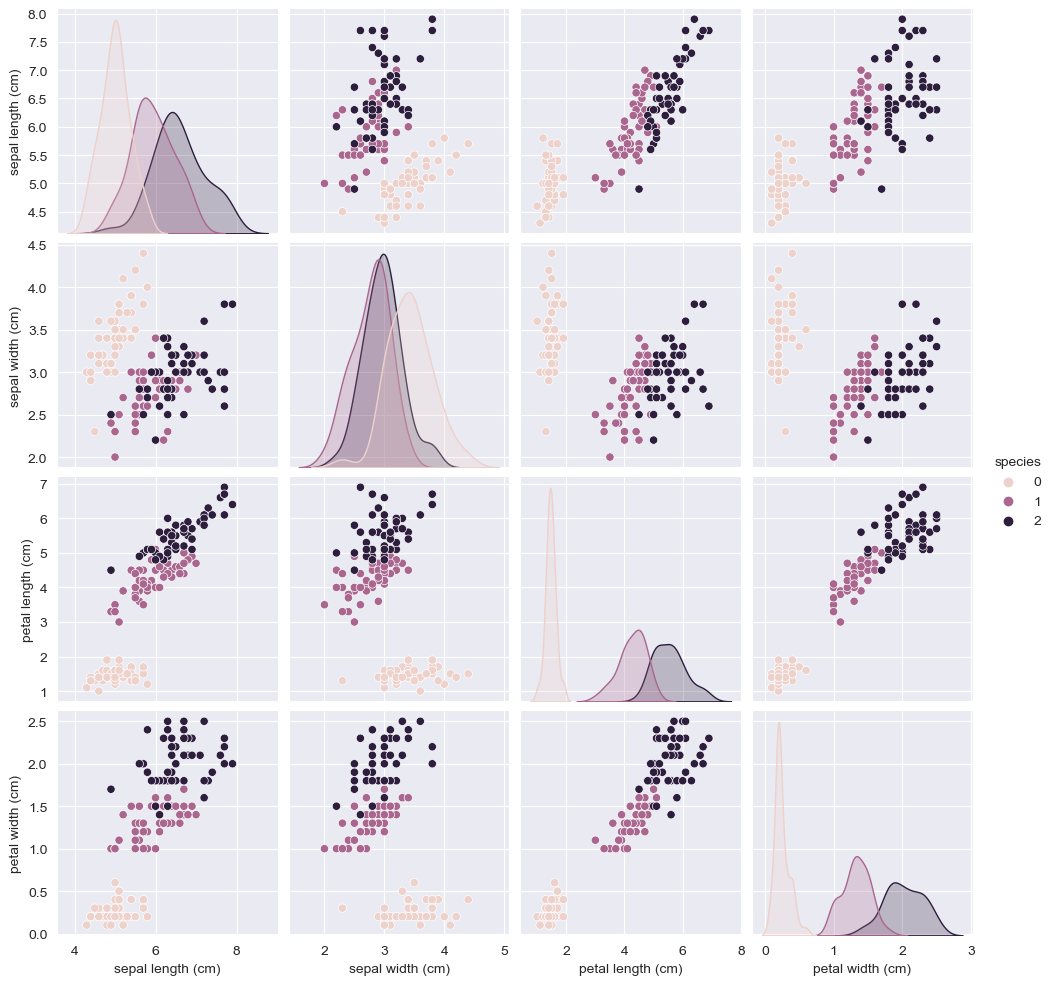

In [43]:
sns.pairplot(iris_data,hue="species")

In [14]:
sns.set_style("darkgrid")
     

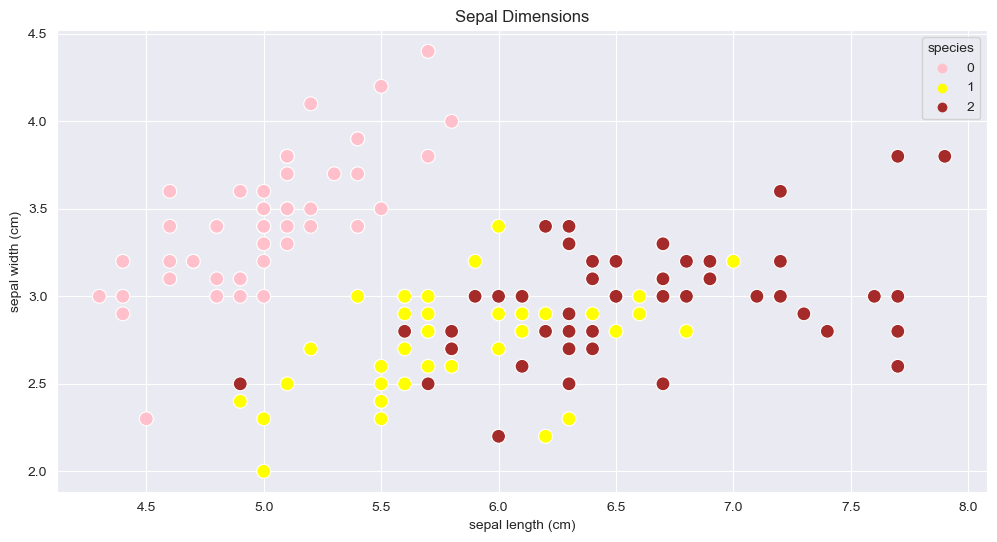

In [19]:
plt.figure(figsize=(12, 6))
plt.title('Sepal Dimensions')

sns.scatterplot(x=iris_data["sepal length (cm)"], 
                y=iris_data["sepal width (cm)"], 
                hue=iris_data["species"],palette = ["pink","yellow","brown"],
                s=100);

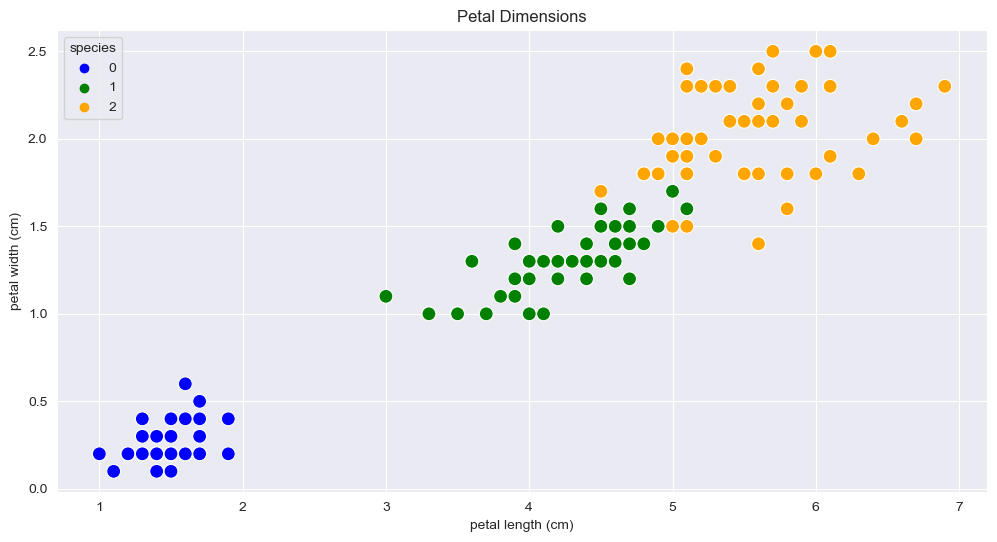

In [21]:
plt.figure(figsize=(12, 6))
plt.title('Petal Dimensions')

sns.scatterplot(x=iris_data["petal length (cm)"], 
                y=iris_data["petal width (cm)"], 
               hue=iris_data["species"],palette = ["blue","green","orange"],
                s=100);

# ANALYZING DISTRIBUTION OF SEPAL & PETAL

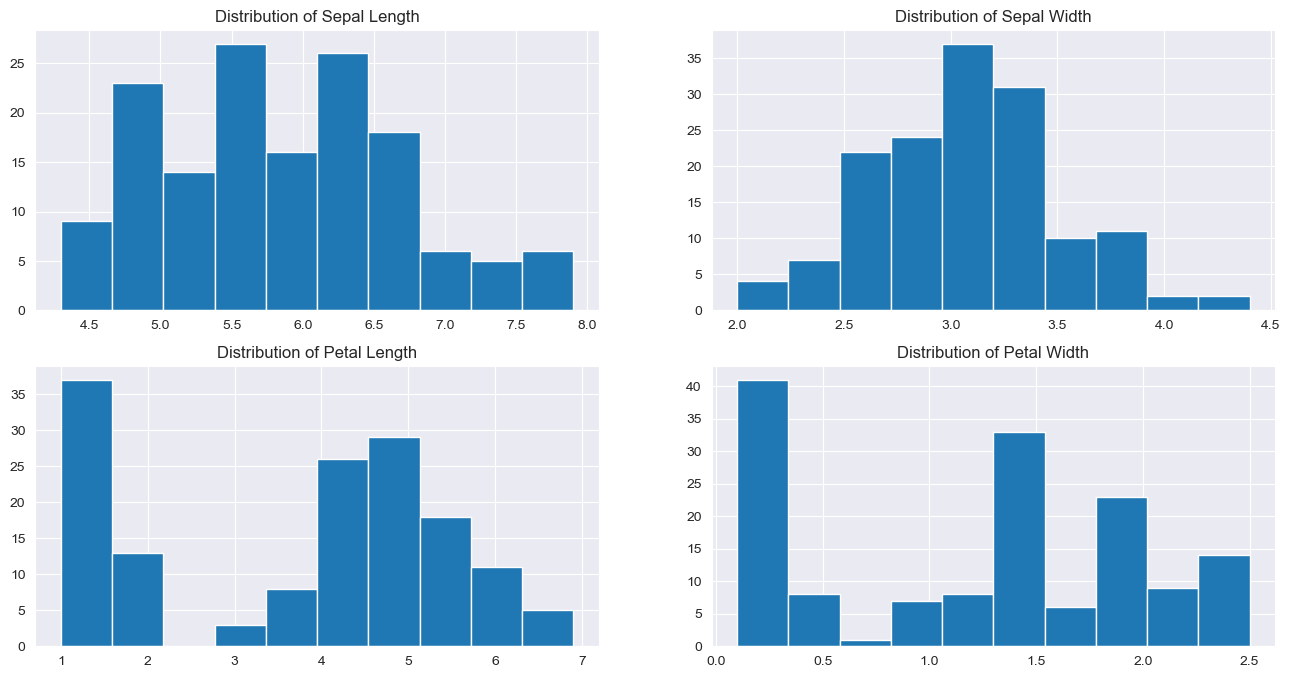

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(16, 8))
#plot for sepal length
axes[0,0].set_title('Distribution of Sepal Length')
axes[0,0].hist(iris_data["sepal length (cm)"]);

#plot for sepal width
axes[0,1].set_title('Distribution of Sepal Width')
axes[0,1].hist(iris_data["sepal width (cm)"]);

#plot for petal length
axes[1,0].set_title('Distribution of Petal Length')
axes[1,0].hist(iris_data["petal length (cm)"]); 

#plot for petal width
axes[1,1].set_title('Distribution of Petal Width')
axes[1,1].hist(iris_data["petal width (cm)"]);


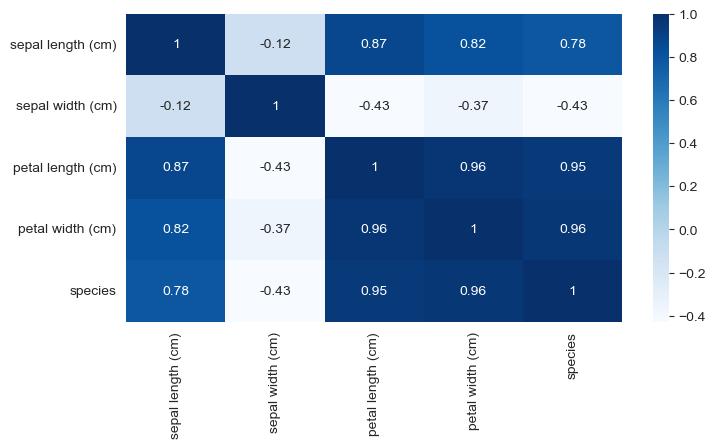

In [24]:
# Corelation between feature and target
plt.figure(figsize=(8,4))
sns.heatmap(iris_data.corr(), annot=True, cmap='Blues');

# TRAINING & TESTING

In [25]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(iris_data, test_size = 0.2)


In [26]:
train.shape, test.shape

((120, 5), (30, 5))

In [27]:
train_x = train[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']]
train_y = train.species
test_x = test[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']]
test_y = test.species

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [29]:
dtree = DecisionTreeClassifier()
dtree.fit(train_x,train_y)
predictions = dtree.predict(test_x)
print("The accuracy of Decision Tree is:", metrics.accuracy_score(predictions, test_y))

The accuracy of Decision Tree is: 0.9666666666666667


In [30]:

X = iris_data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']]
Y = iris_data.species
     

# VISUALIZING THE DECISION TREE